<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Numerical methods: 10. Boundary-value problems
## Shooting method for system of second-order boundary-value equations
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

## Second-order differential equation

We define a **second-order** differential equation with two boundary conditions,
one along each end of the interval:

$$
\begin{array}{rcl}
{{d^2y}\over{dt^2}} &=& f(t,y,y'), \quad t \in [a,b] \\
y(a) &=& \alpha \\
y(b) &=& \beta
\end{array}
$$

This differential equation is called **linear**, when we can rewrite the right-hand side as:
$$
{{d^2y}\over{dt^2}} = p(t) y(t) + q(t) y'(t) + r(t)
$$

There are two steps needed to solve the above differential system with the **shooting method**:

1. Reduce **second-order** to two **first-order** systems.

2. Instead of **boundary-value** problem, solve **initial-value** problem.


----
## First example problem: linear, homogeneous

What if the second-order differential equation is homogeneous ($r=0$)?

$$
\begin{array}{rcl}
{{d^2y}\over{dt^2}} &=& {{3}\over{2}} y(t)^2, \quad t \in [0,1] \\
y(t=0) &=& 4 \\
y(t=1) &=& 1
\end{array}
$$

1. Rewrite to two **first-order** differential equations ($u_1=y; u_2=y'$):
$$
\begin{array}{rcl}
 {{du_1}\over{dt}} & = & u_2 \\ 
 {{du_2}\over{dt}} & = & \frac{3}{2} u_1^2
\end{array}
$$

2. Change from boundary values to **initial values**:
$$
\begin{array}{rcl}
 u_1(t=0) & = & 4 \\
 u_2(t=0) & = & s
\end{array}
$$

Problem: We have to guess the second initial condition, $u_2(0)=s$.

Write right-hand side function:

In [2]:
def rhs(y,t):
    du1dt = y[1]
    du2dt = 3/2*y[0]**2
    return np.array([du1dt,du2dt]).flatten() 

Define boundary conditions and range for unknown initial condition $s$:

In [3]:
a = 0
b = 1
alpha = 4
beta  = 1
n = 101
t = np.linspace(a,b,n)

In [4]:
s = np.arange(-40,-2,2)
m = len(s)
print(s)
y = np.zeros(n*m).reshape(n,m)

[-40 -38 -36 -34 -32 -30 -28 -26 -24 -22 -20 -18 -16 -14 -12 -10  -8  -6
  -4]


Run shooting method over range of $s$ values and plot:

In [5]:
for i in range(len(s)):
    print(i,s[i])
    u_initial = np.array([alpha,s[i]])
    solution1 = integrate.odeint (rhs,u_initial,t)
    y[:,i] = solution1[:,0]

0 -40
1 -38
2 -36
3 -34
4 -32
5 -30
6 -28
7 -26
8 -24
9 -22
10 -20
11 -18
12 -16
13 -14
14 -12
15 -10
16 -8
17 -6
18 -4


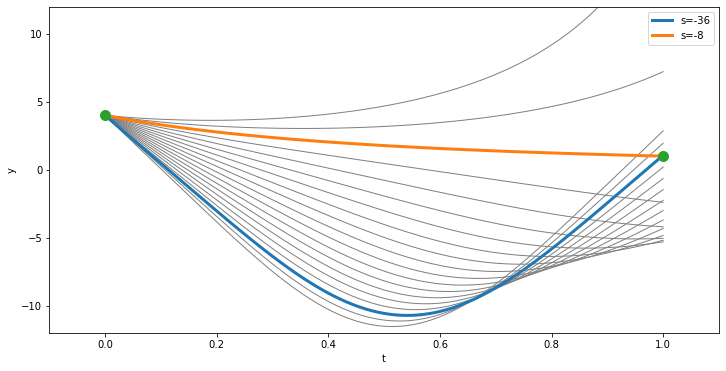

In [6]:
plt.figure(figsize=(12,6))
plt.xlim([-0.1,1.1])
plt.ylim([-12,12])
plt.xlabel('t')
plt.ylabel('y')
for i in range(len(s)):
    plt.plot(t,y[:,i],linewidth=1,color='grey')
i=2
plt.plot(t,y[:,i],linewidth=3,label='s='+str(s[i]))
i=16
plt.plot(t,y[:,i],linewidth=3,label='s='+str(s[i]))
plt.plot([a,b],[alpha,beta],linestyle='none',marker='o',markersize='10')
plt.legend()

----
## Second example problem: linear, inhomogeneous

Can we do better?

Yes, if the system is **linear**, but **inhomogeneous** ($r \ne 0$)!

As an example, solve the second-order differential equation:
$$
y'' = -\frac{2}{t} y' 
       + \frac{2}{t^2} y 
       + \frac{\sin(\ln t)}{t^2}, \quad 1\le t \le 2, \quad y(a)=\alpha, \quad y(b)=\beta
$$

For this differential equation, we know the exact solution:
$$
\begin{array}{rcl}
 y & = & c_1 t 
         + \frac{c_2}{t^2} 
         - \frac{3}{10} \sin(\ln t)
         - \frac{1}{10} \cos(\ln t) \\
 c_2 & = & \frac{1}{70} [8-12\sin(\ln 2) - 4\cos(\ln 2)] \\
 c_1 & = & \frac{11}{10} - c_2
\end{array}
$$
or, as a function:

In [7]:
def fexact(t):
    c2     = (8. - 12.*np.sin(np.log(2.)) - 4.*np.cos(np.log(2.))) / 70.
    c1     = 11. / 10. - c2
    fexact = c1*t + c2/t**2 - 3/10*np.sin(np.log(t)) - 1/10*np.cos(np.log(t))
    return fexact

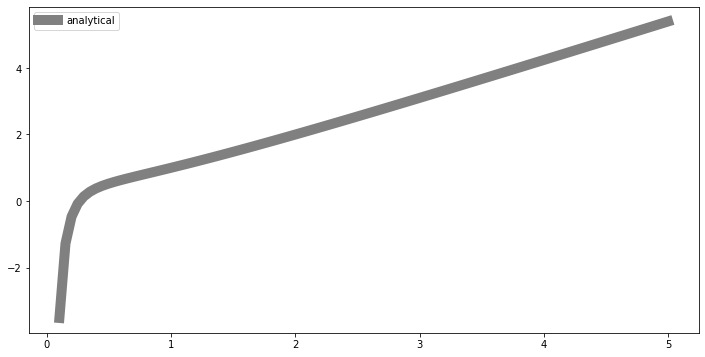

In [8]:
n = 101
a = 0.1
b = 5
t = np.linspace(a,b,n)
plt.figure(figsize=(12,6))
plt.plot(t,fexact(t),linewidth=10,color='gray',label='analytical')
plt.legend()

We now solve the differential equation with the **shooting method** by reducing
the **second-order** to **first-order** differential equations and the **boundary values**
to **initial values**.

$$
\begin{array}{rcl}
 u'_1   & = & u_2 \\ 
 u'_2   & = & -\frac{2}{t} u_2
            + \frac{2}{t^2} u_1
            + \frac{\sin(\ln t)}{t^2} \\ 
 u'_3   & = & u_4 \\ 
 u'_4   & = & -\frac{2}{t} u_4
            + \frac{2}{t^2} u_3
\end{array}
$$
The boundary conditions are:
$$
\begin{array}{rcl}
 u_1(a) & = & \alpha = 1 \\
 u_2(a) & = & 0 \\
 u_3(a) & = & 0\\
 u_4(a) & = & 1
\end{array}
$$

Define right-hand side function:

In [9]:
def rhs(y,t):
    dydt1 = y[1]
    dydt2 = -2./t*y[1] + 2./t**2*y[0] + np.sin(np.log(t))/t**2
    dydt3 = y[3]
    dydt4 = -2./t*y[3] + 2./t**2*y[2]
    return np.array([dydt1,dydt2,dydt3,dydt4]).flatten() 

Set boundary conditions:

In [10]:
t = np.linspace(a,b,n)
alpha = fexact(a)
beta  = fexact(b)
y_initial = np.array([alpha,0,0,1])

Solve as initial-value problem:

In [11]:
solution1 = integrate.odeint (rhs,y_initial,t)
print(solution1.shape)
y = np.zeros(solution1.shape[0])
print(y.shape)

(101, 4)
(101,)


Build solution by adding homogeneous and inhomogeneous solutions:

In [12]:
for i in range(len(solution1)):
    y[i] = solution1[i,0] + (beta-solution1[-1,0])/solution1[-1,2] * solution1[i,2]

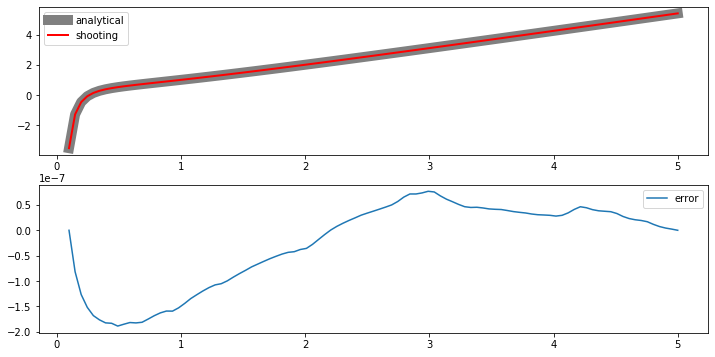

In [13]:
fig,axs = plt.subplots(2,1,figsize=(12,6))
axs[0].plot(t,fexact(t),linewidth=10,color='gray',label='analytical')
axs[0].plot(t,y,linewidth=2,color='red',label='shooting')
axs[0].legend()
axs[1].plot(t,fexact(t)-y,label='error')
axs[1].legend()

[next>](Numerics_lab10_finite_differences.ipynb)

... done

In [14]:
# Lege drei Spaltenvektoren an und verbinde sie zu einer Matrix
x1=np.array([1,2,3,4,5,6,7,8,9,10]).reshape(10,1)
x2=np.array([20,19,18,17,16,15,14,13,12,11]).reshape(10,1)
x3=np.array([1,3,5,7,9,2,4,6,8,10]).reshape(10,1)
x=np.c_[x1,x2,x3]
print(x)

# Sortiere jeweils nach einer Spalte der Matrix
for spalte in [0,1,2]:
    indx=np.argsort(x[:,spalte])
    print('Sortiert nach Spalte ',spalte,indx)
    print(x[indx[:],:])

[[ 1 20  1]
 [ 2 19  3]
 [ 3 18  5]
 [ 4 17  7]
 [ 5 16  9]
 [ 6 15  2]
 [ 7 14  4]
 [ 8 13  6]
 [ 9 12  8]
 [10 11 10]]
Sortiert nach Spalte  0 [0 1 2 3 4 5 6 7 8 9]
[[ 1 20  1]
 [ 2 19  3]
 [ 3 18  5]
 [ 4 17  7]
 [ 5 16  9]
 [ 6 15  2]
 [ 7 14  4]
 [ 8 13  6]
 [ 9 12  8]
 [10 11 10]]
Sortiert nach Spalte  1 [9 8 7 6 5 4 3 2 1 0]
[[10 11 10]
 [ 9 12  8]
 [ 8 13  6]
 [ 7 14  4]
 [ 6 15  2]
 [ 5 16  9]
 [ 4 17  7]
 [ 3 18  5]
 [ 2 19  3]
 [ 1 20  1]]
Sortiert nach Spalte  2 [0 5 1 6 2 7 3 8 4 9]
[[ 1 20  1]
 [ 6 15  2]
 [ 2 19  3]
 [ 7 14  4]
 [ 3 18  5]
 [ 8 13  6]
 [ 4 17  7]
 [ 9 12  8]
 [ 5 16  9]
 [10 11 10]]
